In [1]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support,
    cohen_kappa_score,
)
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV




In [3]:
df = pd.read_csv('final_data.csv')

In [4]:
df.columns

Index(['age', 'height_cm', 'weight_kg', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_agility', 'movement_reactions',
       'movement_balance', 'power_shot_power', 'power_jumping',
       'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle', 'big_potential'],
      dtype='object')

In [8]:
independent_variables = ['age', 'height_cm', 'weight_kg', 'attacking_crossing','attacking_finishing', 'attacking_heading_accuracy','attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
                         'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_agility', 'movement_reactions','movement_balance', 'power_shot_power', 'power_jumping',
                           'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',  'mentality_positioning', 'mentality_vision', 'mentality_penalties','mentality_composure', 
                           'defending_standing_tackle', 'defending_sliding_tackle']

In [9]:
X = df[independent_variables]

flattens y into a 1D array. (vecteur colonne -> vecteur ligne)

In [6]:
y = df["big_potential"]
y = np.ravel(y)
y

array([0, 0, 0, ..., 0, 0, 0], shape=(40669,))

StratifiedKFold: A cross-validation technique that ensures each fold maintains the same class distribution as the original dataset.

n_splits=10: The dataset will be split into 10 folds (i.e., 10 subsets for training/testing).

random_state=42: Ensures reproducibility by setting a fixed random seed.

shuffle=True: Shuffles the dataset before splitting to improve randomness.

In [7]:
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

The formula for the test set size per fold is:
Test set size= Total dataset size\n_splits

In [12]:
for fold_num, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    print((len(X)))
    print(len(X_val))

40669
4067
40669
4067
40669
4067
40669
4067
40669
4067
40669
4067
40669
4067
40669
4067
40669
4067
40669
4066


metrics result:
0: class, non high potential 
1: class, high potential

In [49]:
# base

independent_variables = ['age', 'attacking_crossing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
          'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'mentality_aggression', 'mentality_interceptions', 'mentality_penalties', 'mentality_composure']

target_variable = ["big_potential"]

X = df[independent_variables]
y = df[target_variable]

y = np.ravel(y)

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

classification_reports = []
kappa_scores = []
conf_matrices = []

all_y_true = []
all_y_pred = []


for fold_num, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]

    rf_model = RandomForestClassifier(random_state=42)

    rf_model.fit(X_train, y_train)

    y_val_pred = rf_model.predict(X_val)

    all_y_true.extend(y_val) #appendi for each fold
    all_y_pred.extend(y_val_pred)

    accuracy_fold = accuracy_score(y_val, y_val_pred)
    precision_fold, recall_fold, f1_fold, _ = precision_recall_fscore_support(y_val, y_val_pred, average='binary')
    kappa_fold = cohen_kappa_score(y_val, y_val_pred)

    report_fold = classification_report(y_val, y_val_pred, digits=3)
    classification_reports.append(f"Fold {fold_num}:\n{report_fold}\n")
    kappa_scores.append(kappa_fold)
    conf_matrices.append(confusion_matrix(y_val, y_val_pred))

print("Combined Classification Reports for All Folds:\n")
print("\n".join(classification_reports))

print("Cohen's Kappa Scores for Each Fold:\n", kappa_scores)

final_conf_matrix = confusion_matrix(all_y_true, all_y_pred)
print("Confusion Matrix for Final Evaluation on Entire Dataset:\n", final_conf_matrix)

final_report = classification_report(all_y_true, all_y_pred, digits=3)
final_kappa = cohen_kappa_score(all_y_true, all_y_pred)
print("Final Classification Report on Entire Dataset:\n", final_report)
print("Cohen's Kappa for Final Evaluation on Entire Dataset:", final_kappa)



Combined Classification Reports for All Folds:

Fold 1:
              precision    recall  f1-score   support

           0      0.943     0.998     0.970      3805
           1      0.791     0.130     0.223       262

    accuracy                          0.942      4067
   macro avg      0.867     0.564     0.596      4067
weighted avg      0.934     0.942     0.922      4067


Fold 2:
              precision    recall  f1-score   support

           0      0.943     0.997     0.969      3805
           1      0.756     0.118     0.205       262

    accuracy                          0.941      4067
   macro avg      0.849     0.558     0.587      4067
weighted avg      0.931     0.941     0.920      4067


Fold 3:
              precision    recall  f1-score   support

           0      0.943     0.997     0.969      3805
           1      0.767     0.126     0.216       262

    accuracy                          0.941      4067
   macro avg      0.855     0.562     0.593      4067


In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use the trained model to predict on the validation set (X_val)
y_val_pred = rf_model.predict(X_val)

# Calculate the accuracy score
accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracy score
print(f"Accuracy on validation set: {accuracy:.3f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred, digits=3))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


Accuracy on validation set: 0.941
Classification Report:
              precision    recall  f1-score   support

           0      0.942     0.998     0.969      3804
           1      0.769     0.115     0.199       262

    accuracy                          0.941      4066
   macro avg      0.856     0.556     0.584      4066
weighted avg      0.931     0.941     0.920      4066

Confusion Matrix:
[[3795    9]
 [ 232   30]]


In [12]:
# base

independent_variables = ['age', 'height_cm', 'weight_kg', 'attacking_crossing','attacking_finishing', 'attacking_heading_accuracy','attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
                         'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_agility', 'movement_reactions','movement_balance', 'power_shot_power', 'power_jumping',
                           'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',  'mentality_positioning', 'mentality_vision', 'mentality_penalties','mentality_composure', 
                           'defending_standing_tackle', 'defending_sliding_tackle']

target_variable = ["big_potential"]

X = df[independent_variables]
y = df[target_variable]

y = np.ravel(y)

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

classification_reports = []
kappa_scores = []
conf_matrices = []

all_y_true = []
all_y_pred = []


for fold_num, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]

    rf_model = RandomForestClassifier(random_state=42)

    rf_model.fit(X_train, y_train)

    y_val_pred = rf_model.predict(X_val)

    all_y_true.extend(y_val)
    all_y_pred.extend(y_val_pred)

    accuracy_fold = accuracy_score(y_val, y_val_pred)
    precision_fold, recall_fold, f1_fold, _ = precision_recall_fscore_support(y_val, y_val_pred, average='binary')
    kappa_fold = cohen_kappa_score(y_val, y_val_pred)

    report_fold = classification_report(y_val, y_val_pred, digits=3)
    classification_reports.append(f"Fold {fold_num}:\n{report_fold}\n")
    kappa_scores.append(kappa_fold)
    conf_matrices.append(confusion_matrix(y_val, y_val_pred))

print("Combined Classification Reports for All Folds:\n")
print("\n".join(classification_reports))

print("Cohen's Kappa Scores for Each Fold:\n", kappa_scores)

final_conf_matrix = confusion_matrix(all_y_true, all_y_pred)
print("Confusion Matrix for Final Evaluation on Entire Dataset:\n", final_conf_matrix)

final_report = classification_report(all_y_true, all_y_pred, digits=3)
final_kappa = cohen_kappa_score(all_y_true, all_y_pred)
print("Final Classification Report on Entire Dataset:\n", final_report)
print("Cohen's Kappa for Final Evaluation on Entire Dataset:", final_kappa)



Combined Classification Reports for All Folds:

Fold 1:
              precision    recall  f1-score   support

           0      0.942     0.998     0.969      3805
           1      0.789     0.115     0.200       262

    accuracy                          0.941      4067
   macro avg      0.866     0.556     0.585      4067
weighted avg      0.933     0.941     0.920      4067


Fold 2:
              precision    recall  f1-score   support

           0      0.944     0.998     0.970      3805
           1      0.833     0.134     0.230       262

    accuracy                          0.942      4067
   macro avg      0.888     0.566     0.600      4067
weighted avg      0.936     0.942     0.922      4067


Fold 3:
              precision    recall  f1-score   support

           0      0.943     0.998     0.970      3805
           1      0.805     0.126     0.218       262

    accuracy                          0.942      4067
   macro avg      0.874     0.562     0.594      4067


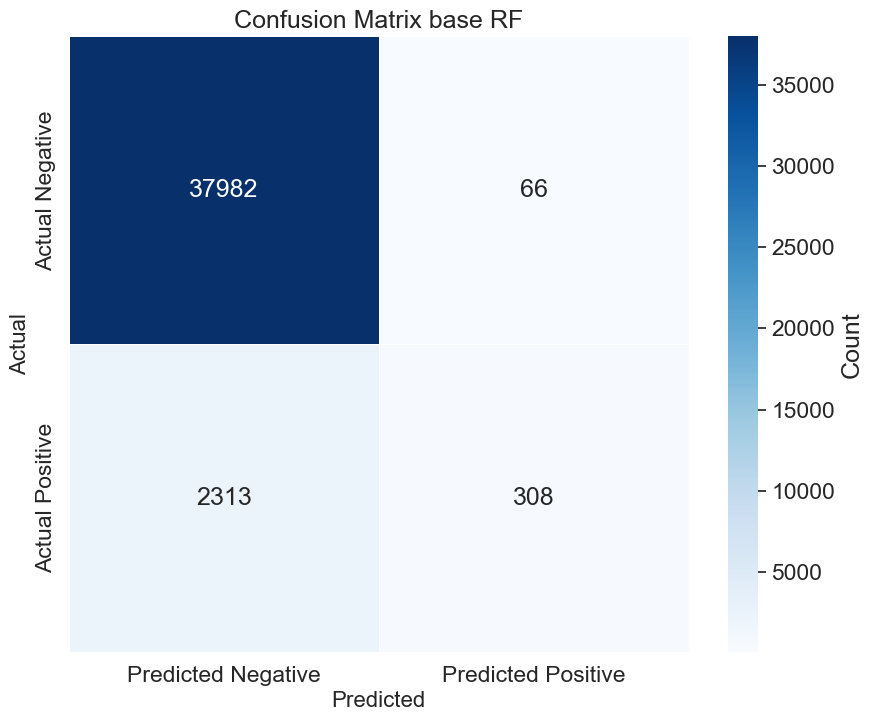

In [13]:
conf_matrix = np.array( [[37982 ,   66],
                         [ 2313  , 308]])

conf_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

sns.set(font_scale=1.5)

plt.figure(figsize=(10, 8))

sns.heatmap(conf_df, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar_kws={'label': 'Count'})

plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix base RF', fontsize=18)

plt.show()

In [ ]:
#smote
independent_variables = ['age', 'attacking_crossing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
          'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'mentality_aggression', 'mentality_interceptions', 'mentality_penalties', 'mentality_composure']

target_variable = ["big_potential"]

X = df[independent_variables]
y = df[target_variable]

y = np.ravel(y)

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

classification_reports = []
kappa_scores = []
conf_matrices = []

all_y_true = []
all_y_pred = []

for fold_num, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_resampled, y_train_resampled)

    y_val_pred = rf_model.predict(X_val)

    all_y_true.extend(y_val)
    all_y_pred.extend(y_val_pred)

    accuracy_fold = accuracy_score(y_val, y_val_pred)
    precision_fold, recall_fold, f1_fold, _ = precision_recall_fscore_support(y_val, y_val_pred, average='binary')
    kappa_fold = cohen_kappa_score(y_val, y_val_pred)

    report_fold = classification_report(y_val, y_val_pred, digits=3)
    classification_reports.append(f"Fold {fold_num}:\n{report_fold}\n")
    kappa_scores.append(kappa_fold)
    conf_matrices.append(confusion_matrix(y_val, y_val_pred))

print("Combined Classification Reports for All Folds:\n")
print("\n".join(classification_reports))

print("Cohen's Kappa Scores for Each Fold:\n", kappa_scores)

final_conf_matrix = confusion_matrix(all_y_true, all_y_pred)
print("Confusion Matrix for Final Evaluation on Entire Dataset:\n", final_conf_matrix)

final_report = classification_report(all_y_true, all_y_pred, digits=3)
final_kappa = cohen_kappa_score(all_y_true, all_y_pred)
print("Final Classification Report on Entire Dataset:\n", final_report)
print("Cohen's Kappa for Final Evaluation on Entire Dataset:", final_kappa)


Combined Classification Reports for All Folds:

Fold 1:
              precision    recall  f1-score   support

           0      0.964     0.952     0.958      3805
           1      0.408     0.477     0.440       262

    accuracy                          0.922      4067
   macro avg      0.686     0.715     0.699      4067
weighted avg      0.928     0.922     0.925      4067


Fold 2:
              precision    recall  f1-score   support

           0      0.966     0.956     0.961      3805
           1      0.447     0.515     0.479       262

    accuracy                          0.928      4067
   macro avg      0.707     0.736     0.720      4067
weighted avg      0.933     0.928     0.930      4067


Fold 3:
              precision    recall  f1-score   support

           0      0.967     0.955     0.961      3805
           1      0.446     0.523     0.482       262

    accuracy                          0.927      4067
   macro avg      0.707     0.739     0.721      4067


Instead of simply duplicating existing minority class samples, SMOTE:

    Finds the k-nearest neighbors of a minority class sample.

    Generates new samples along the line between existing samples and their neighbors.

    Creates synthetic points that help the model generalize better.


In [18]:
#SMOTE + HP Tuning

import joblib

independent_variables = ['age', 'attacking_crossing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
          'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'mentality_aggression', 'mentality_interceptions', 'mentality_penalties', 'mentality_composure']

target_variable = ["big_potential"]

X = df[independent_variables]
y = df[target_variable]

y = np.ravel(y)

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
best_model_final = None
classification_reports = []
kappa_scores = []
conf_matrices = []

all_y_true = []
all_y_pred = []

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10, 50, None],
    'criterion':  ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# Set up StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for fold_num, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    rf_model = RandomForestClassifier(random_state=42)

    # Use RandomizedSearchCV for faster tuning
    random_search = RandomizedSearchCV(
        estimator=rf_model, 
        param_distributions=param_grid, 
        n_iter=8,  # Only try 10 random combinations
        scoring='f1_macro', 
        cv=3, 
        n_jobs=-1,  # Use all CPU cores for parallel execution
        random_state=42
    )

    # Fit model
    random_search.fit(X_train_resampled, y_train_resampled)

    # Get the best model
    best_model = random_search.best_estimator_

    if best_model_final is None or random_search.best_score_ > random_search.best_score_:
        best_model_final = best_model

    y_val_pred = best_model.predict(X_val)

    all_y_true.extend(y_val)
    all_y_pred.extend(y_val_pred)

    accuracy_fold = accuracy_score(y_val, y_val_pred)
    precision_fold, recall_fold, f1_fold, _ = precision_recall_fscore_support(y_val, y_val_pred, average='binary')
    kappa_fold = cohen_kappa_score(y_val, y_val_pred)

    report_fold = classification_report(y_val, y_val_pred, digits=3)
    classification_reports.append(f"Fold {fold_num}:\n{report_fold}\n")
    kappa_scores.append(kappa_fold)
    conf_matrices.append(confusion_matrix(y_val, y_val_pred))

final_model_filename = "rf_model_final.joblib"
joblib.dump(best_model_final, final_model_filename)  # Save the best final model

print("Combined Classification Reports for All Folds:\n")
print("\n".join(classification_reports))

print("Cohen's Kappa Scores for Each Fold:\n", kappa_scores)

final_conf_matrix = confusion_matrix(all_y_true, all_y_pred)
print("Confusion Matrix for Final Evaluation on Entire Dataset:\n", final_conf_matrix)

final_report = classification_report(all_y_true, all_y_pred, digits=3)
final_kappa = cohen_kappa_score(all_y_true, all_y_pred)
print("Final Classification Report on Entire Dataset:\n", final_report)
print("Cohen's Kappa for Final Evaluation on Entire Dataset:", final_kappa)

print("Best Hyperparameters:", random_search.best_params_)


Combined Classification Reports for All Folds:

Fold 1:
              precision    recall  f1-score   support

           0      0.960     0.969     0.964      3805
           1      0.476     0.408     0.439       262

    accuracy                          0.933      4067
   macro avg      0.718     0.689     0.702      4067
weighted avg      0.928     0.933     0.930      4067


Fold 2:
              precision    recall  f1-score   support

           0      0.963     0.972     0.968      3805
           1      0.533     0.462     0.495       262

    accuracy                          0.939      4067
   macro avg      0.748     0.717     0.731      4067
weighted avg      0.936     0.939     0.937      4067


Fold 3:
              precision    recall  f1-score   support

           0      0.963     0.971     0.967      3805
           1      0.524     0.462     0.491       262

    accuracy                          0.938      4067
   macro avg      0.744     0.716     0.729      4067


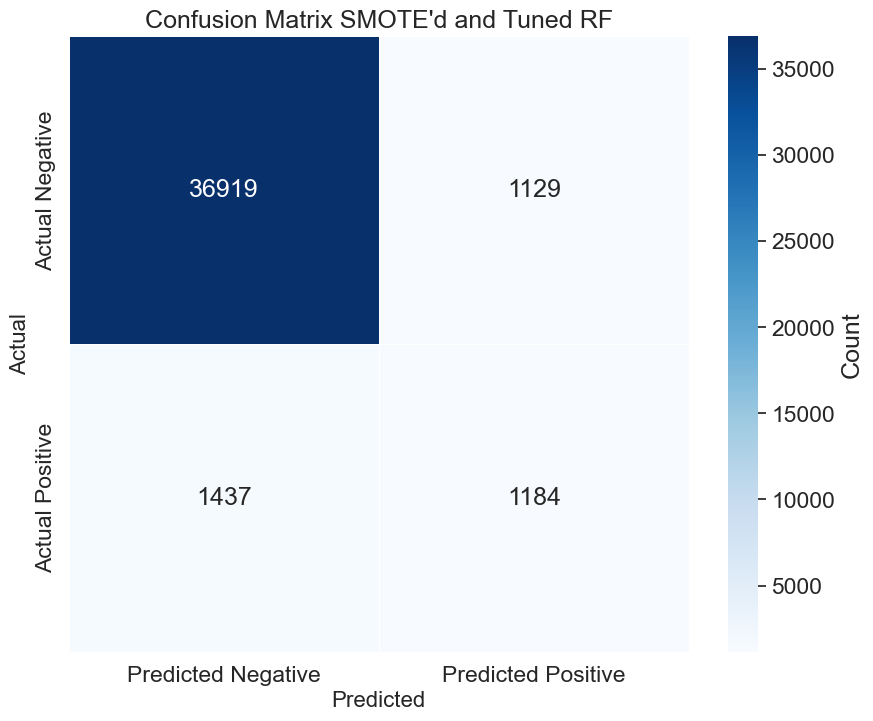

In [19]:
conf_matrix = np.array([[36919, 1129],
                        [ 1437, 1184]])

conf_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

sns.set(font_scale=1.5)

plt.figure(figsize=(10, 8))

sns.heatmap(conf_df, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar_kws={'label': 'Count'})

plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix SMOTE\'d and Tuned RF', fontsize=18)

plt.show()

In [20]:
tp_indices = np.where((np.array(all_y_true) == 1) & (np.array(all_y_pred) == 1))[0]

true_positives_df = df.iloc[tp_indices]

print("All True Positives:")
print(true_positives_df)


All True Positives:
       age  height_cm  weight_kg  attacking_crossing  attacking_finishing  \
70      35        171         65                  54                   84   
80      32        185         84                  85                   62   
485     36        170         65                  65                   61   
526     29        165         63                  78                   67   
576     29        173         70                  70                   91   
...    ...        ...        ...                 ...                  ...   
40438   18        178         67                  58                   50   
40439   20        181         74                  54                   29   
40488   19        175         65                  38                   67   
40539   18        176         68                  46                   45   
40587   16        170         64                  30                   55   

       attacking_heading_accuracy  attacking_short_pass

In [ ]:
player_data = {
    "age": 25.0,
    "attacking_crossing": 100.0,
    "attacking_heading_accuracy": 100.0,
    "attacking_short_passing": 100.0,
    "attacking_volleys": 100.0,
    "skill_dribbling": 100.0,
    "skill_curve": 100.0,
    "skill_fk_accuracy": 100.0,
    "skill_long_passing": 100.0,
    "skill_ball_control": 100.0,
    "mentality_aggression": 100.0,
    "mentality_interceptions": 100.0,
    "mentality_penalties": 100.0,
    "mentality_composure": 100.0
}

player_df = pd.DataFrame([player_data])

# Predict the potential using the trained model
predicted_value = best_model_final.predict(player_df)

if predicted_value == 1:
    print("The player has high potential.")
else:
    print("The player does not have high potential.")

predicted_value

The player does not have high potential.


array([0])

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use the trained model to predict on the validation set (X_val)
y_val_pred = best_model.predict(X_val)

# Calculate the accuracy score
accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracy score
print(f"Accuracy on validation set: {accuracy:.3f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred, digits=3))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


Accuracy on validation set: 0.937
Classification Report:
              precision    recall  f1-score   support

           0      0.964     0.968     0.966      3804
           1      0.510     0.481     0.495       262

    accuracy                          0.937      4066
   macro avg      0.737     0.725     0.731      4066
weighted avg      0.935     0.937     0.936      4066

Confusion Matrix:
[[3683  121]
 [ 136  126]]


In [62]:
y_val_pred = best_model_final.predict(X_val)

# Get the indices of the players that the model predicts as high potential (y_val_pred == 1)
high_potential_indices = y_val_pred == 1

# Filter the rows in X_val where the prediction is high potential
high_potential_players = X_val[high_potential_indices]

# Display the statistics of the players predicted as high potential
print("Statistics of players predicted as high potential:")
high_potential_players.iloc[0]

Statistics of players predicted as high potential:


age                           27.0
attacking_crossing            63.0
attacking_heading_accuracy    59.0
attacking_short_passing       76.0
attacking_volleys             59.0
skill_dribbling               75.0
skill_curve                   67.0
skill_fk_accuracy             63.0
skill_long_passing            72.0
skill_ball_control            76.0
mentality_aggression          81.0
mentality_interceptions       81.0
mentality_penalties           64.0
mentality_composure           75.0
Name: 671, dtype: float64

In [ ]:
import pandas as pd

# Define the player's statistics as a dictionary
new_player_stats = {
    'age': 27.0,
    'attacking_crossing': 63.0,
    'attacking_heading_accuracy': 59.0,
    'attacking_short_passing': 76.0,
    'attacking_volleys': 59.0,
    'skill_dribbling': 75.0,
    'skill_curve': 67.0,
    'skill_fk_accuracy': 63.0,
    'skill_long_passing': 72.0,
    'skill_ball_control': 76.0,
    'mentality_aggression': 81.0,
    'mentality_interceptions': 81.0,
    'mentality_penalties': 64.0,
    'mentality_composure': 75.0
}

# Load the model later
# best_model_final = joblib.load("rf_model_potential.pkl")

# Convert the dictionary into a pandas DataFrame (single row)
new_player_df = pd.DataFrame([new_player_stats])

# Use the trained model to predict the player's potential
predicted_value = best_model_final.predict(new_player_df)

# Display the prediction result
if predicted_value == 1:
    print("The player has high potential.")
else:
    print("The player does not have high potential.")


The player has high potential.
